In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

# Monk 1,2,3 with SGD, BFGS and L-BFGS

### Load  Monk dataset

In [2]:
# choose monk dataset
monk = str(3)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
x_train, x_test = decode_patterns(encoding, features, train_data, test_data)
y_train, y_test = transform_labels(train_data, test_data)

In [3]:
architecture = [17, 4, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron]
common_network = Network(architecture, neurons)
loss_object = SquaredError("tangentH")

## SGD

In [35]:
# hyperparameters
learning_rate = 0.01
momentum = 0.9
regularization = 0.0
batch_size = len(x_train)
epsilon = 1e-5
epochs = 100
network = copy.deepcopy(common_network)

In [36]:
tic = time()
# 5. train
loss_tr_sgd, mis_tr_sgd, \
loss_ts_sgd, mis_ts_sgd, \
norm_gradients_sgd = network.train_SGD(x_train=x_train, 
                                       y_train=y_train, 
                                       x_test=None,#x_test,
                                       y_test=None,#y_test,
                                       lossObject=loss_object,
                                       epochs=epochs, 
                                       learning_rate=learning_rate, 
                                       batch_size=batch_size,
                                       momentum=momentum, 
                                       regularization=regularization,
                                       epsilon=epsilon)
toc = time()

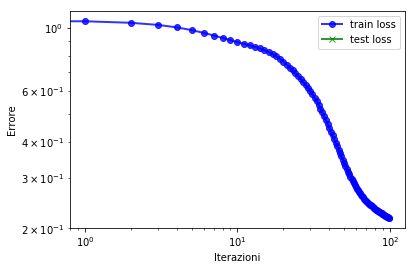

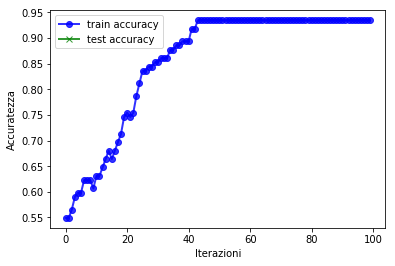

accuracy train: 0.9344262295081968
accuracy test: None
loss train: 0.21733094294085165
loss test: None
time: 1.83063697815
norm gradient last: 0.07393315802816136
iterazioni: 100


In [37]:
plot_train_test_learning_curve_loss(loss_ts_sgd, loss_tr_sgd)
plot_train_test_learning_curve_accuracy(mis_tr_sgd, mis_ts_sgd)
print "accuracy train:", 1 - mis_tr_sgd[-1]
print "accuracy test:", 1 - mis_ts_sgd[-1] if len(mis_ts_sgd) > 0 else None
print "loss train:", loss_tr_sgd[-1]
print "loss test:", loss_ts_sgd[-1] if len(loss_ts_sgd) > 0 else None
print "time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]
print "iterazioni:", len(loss_tr_sgd)

## BFGS

In [31]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.05
epsilon = 1e-5
epochs = 1000

network = copy.deepcopy(common_network)

In [32]:
tic = time()
loss_tr_bfgs, mis_tr_bfgs, loss_ts_bfgs, mis_ts_bfgs, \
alphas_bfgs, norm_gradients_bfgs, \
cond_bfgs = network.train_BFGS(x_train=x_train,
                               y_train=y_train, 
                               x_test=None,#x_test, 
                               y_test=None,#y_test,
                               theta=theta, c_1=c_1, c_2=c_2, 
                               lossObject=loss_object, 
                               regularization=lambda_, 
                               epochs=epochs, epsilon=epsilon,
                               line_search='wolfe')
toc = time()

stop: gradient norm, epoch 89


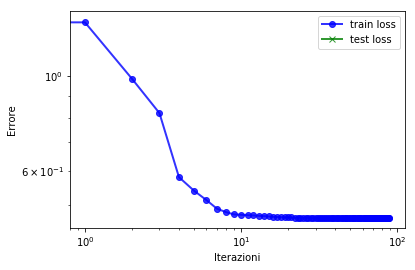

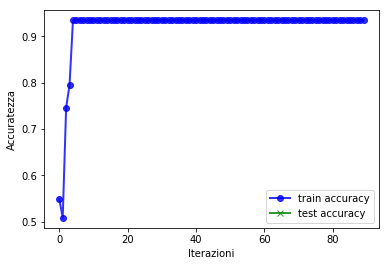

accuracy train: 0.9344262295081968
accuracy test: None
loss train: 0.46645279854995464
loss test: None
training time: 3.42631411552
norm gradient last: 8.924073508076563e-06
iterazioni: 90


In [33]:
plot_train_test_learning_curve_loss(loss_ts_bfgs, loss_tr_bfgs) 
plot_train_test_learning_curve_accuracy(mis_tr_bfgs, mis_ts_bfgs)
print "accuracy train:", 1 - mis_tr_bfgs[-1]
print "accuracy test:", 1 - mis_ts_bfgs[-1] if len(mis_ts_bfgs) > 0 else None
print "loss train:", loss_tr_bfgs[-1]
print "loss test:", loss_ts_bfgs[-1] if len(loss_ts_bfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]
print "iterazioni:", len(loss_tr_bfgs)

# L- BFGS

In [27]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.05
epsilon = 1e-5
epochs = 1000
m = 5

network = copy.deepcopy(common_network)

In [29]:
tic = time()
loss_tr_lbfgs, mis_tr_lbfgs, loss_ts_lbfgs, \
mis_ts_lbfgs, alphas_lbfgs, norm_gradients_lbfgs, \
cond_lbfgs = network.train_LBFGS(x_train=x_train,
                                 y_train=y_train,
                                 x_test=None,#x_test, 
                                 y_test=None, #y_test,
                                 theta=theta, c_1=c_1, c_2=c_2, 
                                 lossObject=loss_object,
                                 regularization=lambda_, 
                                 epochs=epochs, epsilon=epsilon, m=m, 
                                 line_search='wolfe')
toc = time()

stop: norm gradient, epoch 95


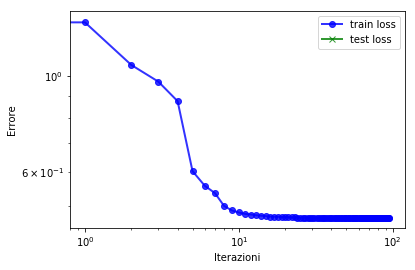

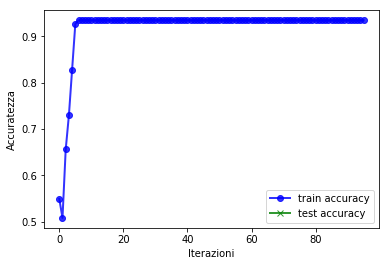

accuracy train: 0.9344262295081968
accuracy test: None
loss train: 0.4678670849048392
loss test: None
training time: 4.05198693275
norm gradient last: 6.087035469367398e-06
iterazioni: 96


In [30]:
plot_train_test_learning_curve_loss(loss_ts_lbfgs, loss_tr_lbfgs)
plot_train_test_learning_curve_accuracy(mis_tr_lbfgs, mis_ts_lbfgs)
print "accuracy train:", 1 - mis_tr_lbfgs[-1]
print "accuracy test:", 1 - mis_ts_lbfgs[-1] if len(mis_ts_lbfgs) > 0 else None
print "loss train:", loss_tr_lbfgs[-1]
print "loss test:", loss_ts_lbfgs[-1] if len(loss_ts_lbfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]
print "iterazioni:", len(loss_tr_lbfgs)

## Optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)
- condition number of H vs iterations

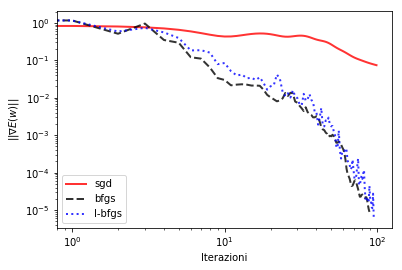

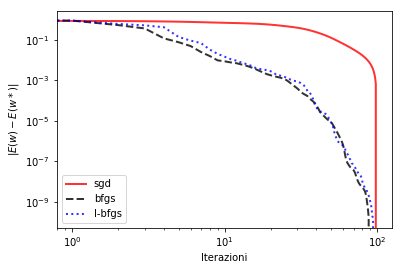

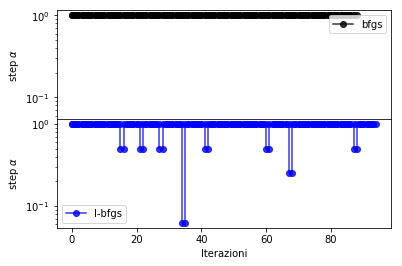

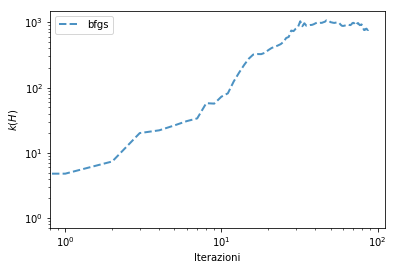

In [38]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)
plot_condition_number_vs_iterations(cond_bfgs, cond_lbfgs=None)

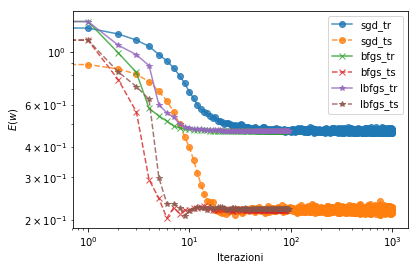

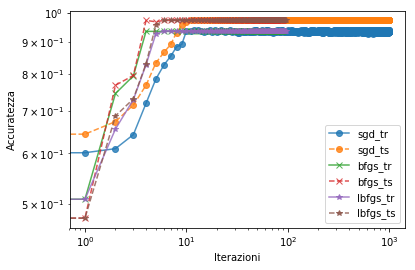

In [26]:
plot_all_loss(loss_tr_sgd, loss_ts_sgd, loss_tr_bfgs, loss_ts_bfgs, loss_tr_lbfgs, loss_ts_lbfgs,\
             xscale='log', yscale='log')
plot_all_accuracy(mis_tr_sgd, mis_ts_sgd, mis_tr_bfgs, mis_ts_bfgs, mis_tr_lbfgs, mis_ts_lbfgs, \
                  xscale='log', yscale='log')